In [1]:
import pydelia
import numpy as np
import matplotlib.pyplot as plt

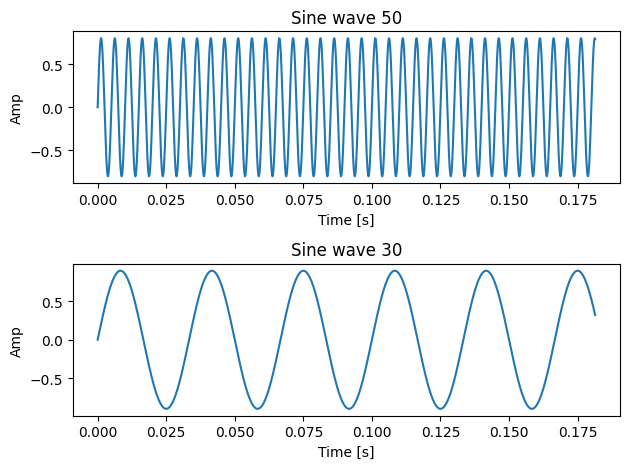

In [2]:
sr = 44100
dur = 1.0

sine_30 = pydelia.sine_wave(freq=30, amp=0.9, sr=sr, dur=dur)
sine_50 = pydelia.sine_wave(freq=200, amp=0.8, sr=sr, dur=dur)

t = np.linspace(0, dur, int(sr*dur), endpoint=False)

plt.subplot(2,1,1)
plt.plot(t[:8000], sine_50[:8000])
plt.title("Sine wave 50")
plt.xlabel("Time [s]")
plt.ylabel("Amp")

plt.subplot(2,1,2)
plt.plot(t[:8000], sine_30[0:8000])
plt.title("Sine wave 30")
plt.xlabel("Time [s]")
plt.ylabel("Amp")

plt.tight_layout();
plt.show()


44100


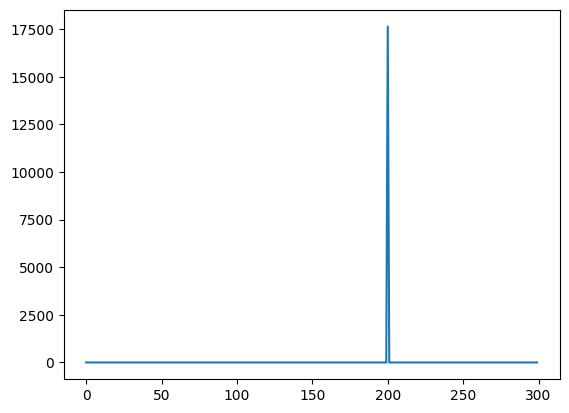

In [3]:
delia_fft = pydelia.fft(sine_50)

N = len(delia_fft)
print(N)

bins = pydelia.fft_frequencies(N, sr)
mags = pydelia.magnitude(delia_fft)
phase = pydelia.phase(delia_fft)

plt.plot(bins[:300], mags[:300])  # Plot only  the lower frequency rang


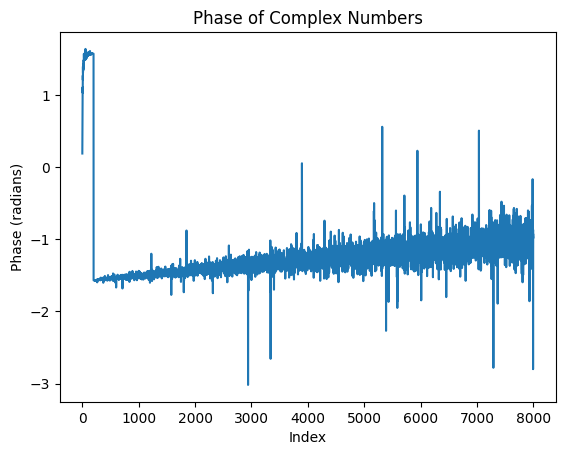

In [4]:

plt.plot(bins[: 8000], phase[: 8000])
plt.title('Phase of Complex Numbers')
plt.ylabel('Phase (radians)')
plt.xlabel('Index')

plt.show()

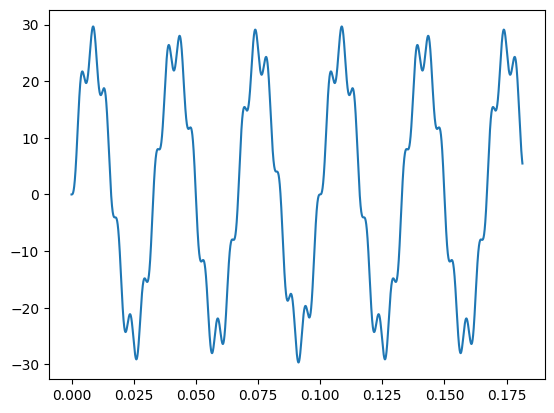

In [5]:
np_conv = np.convolve(sine_50, sine_30, mode="full")

# numpyu convoltuions does not appear to to normalize
plt.plot(t[0:8000], np_conv[0:8000], label="Numpy Conv")
plt.show()

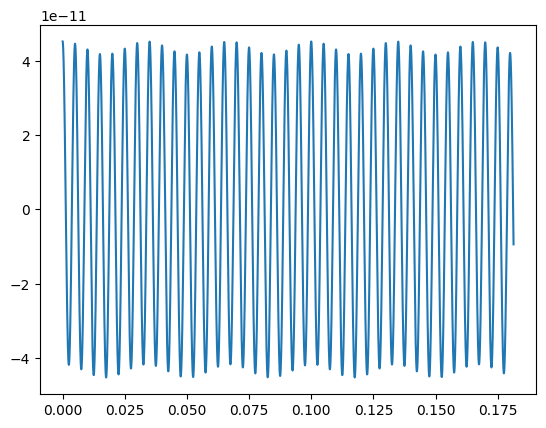

In [7]:
delia_conv = pydelia.fft_convolve(sine_50, sine_30)

plt.plot(t[0:8000], delia_conv[0:8000], label ="Delia Conv")
plt.show()

In [8]:
len(delia_conv), len(np_conv
                    )

(44100, 88199)

In [9]:
delia_conv[0]

(4.519298262824141e-11+1.1224683348926347e-14j)

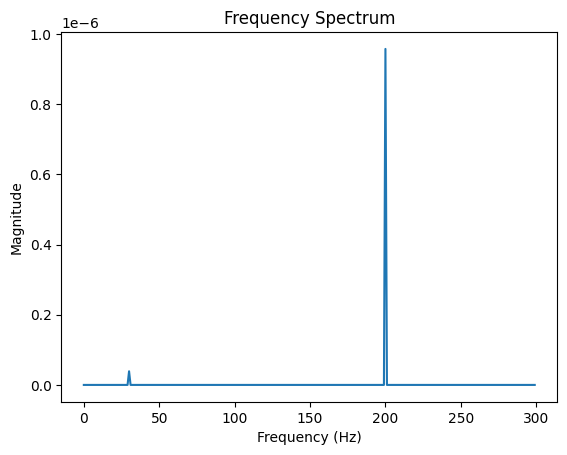

In [10]:
new_wave = []

for sample in delia_conv:
    new_wave.append(sample.real)


result = pydelia.fft(new_wave)

bins = pydelia.fft_frequencies(N, sr)
mags = pydelia.magnitude(result)
phase = pydelia.phase(result)

# lets look at the lower freq only
plt.plot(bins[:300], mags[:300])  # Plot only the positive frequencies
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.savefig("my_convolve.png", dpi=300, format='png', transparent=True)


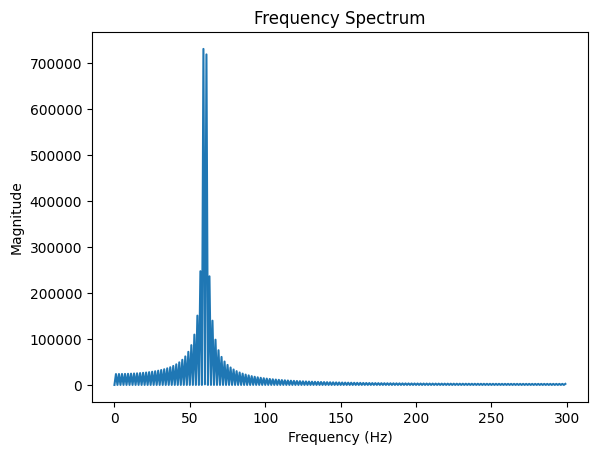

In [11]:

np_wave = []

for sample in np_conv:
    np_wave.append(sample.real)

result = pydelia.fft(np_wave)

bins = pydelia.fft_frequencies(N, sr)
mags = pydelia.magnitude(result)
phase = pydelia.phase(result)

# lets look at the lower freq only
plt.plot(bins[:300], mags[:300])  # Plot only the positive frequencies
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.savefig("np_convolve.png", dpi=300, format='png', transparent=True)

